In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

In [33]:
df = pd.read_csv('Recruitment_Data_updated.csv')

In [34]:
df.head()

,attrition,performance_rating,sales_quota_pct,recruiting_source
0,0.000707,2.976686,0.604739,Applied Online
1,-0.019452,2.989157,0.396567,NaN
2,-0.009998,2.993355,0.206242,Applied Online
3,-0.003004,1.989966,-0.475037,NaN
4,-0.025405,3.016559,0.345470,Campus


In [35]:
df.tail()

,attrition,performance_rating,sales_quota_pct,recruiting_source
107349,0.002813,3.003288,1.041518,NaN
107350,0.998179,2.997723,1.349780,NaN
107351,-0.016202,2.992603,0.791637,NaN
107352,-0.023847,2.005391,0.749299,NaN
107353,-0.009020,1.988047,2.896500,Applied Online


In [36]:
df.shape

(107354, 4)

In [37]:
df.dtypes

attrition             float64
performance_rating    float64
sales_quota_pct       float64
recruiting_source      object
dtype: object

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107354 entries, 0 to 107353
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   attrition           107354 non-null  float64
 1   performance_rating  107354 non-null  float64
 2   sales_quota_pct     107354 non-null  float64
 3   recruiting_source   57753 non-null   object 
dtypes: float64(3), object(1)
memory usage: 3.3+ MB


# Data Cleaning and Handling Missing Values
* Check for missing values and decide on strategies for handling them, especially in recruiting_source.
* Remove or handle any erroneous values in sales_quota_pct.

**Step 1:Check for Missing Values** 

In [39]:
# Count of missing values in each column
missing_values = df.isnull().sum()

# Percentage of missing values
missing_percentage = (missing_values / len(df)) * 100

# Display missing values and their percentages
missing_info = pd.DataFrame({'Missing Count': missing_values, 'Missing Percentage': missing_percentage})
print(missing_info)

                    Missing Count  Missing Percentage
attrition                       0            0.000000
performance_rating              0            0.000000
sales_quota_pct                 0            0.000000
recruiting_source           49601           46.203216


**Step 2: Analyze the Impact of Missing Values in recruiting_source**

In [40]:
# Display rows where 'recruiting_source' is missing
missing_recruiting_source = df[df['recruiting_source'].isnull()]
print(missing_recruiting_source.head())

    attrition  performance_rating  sales_quota_pct recruiting_source
1   -0.019452            2.989157         0.396567               NaN
3   -0.003004            1.989966        -0.475037               NaN
6   -0.003765            3.997125         2.067969               NaN
7    0.003744            2.984290         0.848081               NaN
11  -0.003309            2.985665         1.558246               NaN


**Step 3: Choose a Strategy & verify handling**

In [41]:
# Drop rows where 'recruiting_source' is missing
df = df.dropna(subset=['recruiting_source'])

# Impute with the most common recruiting source
most_common_source = df['recruiting_source'].mode()[0]
df['recruiting_source'].fillna(most_common_source, inplace=True)

# Replace missing values with a new category 'Unknown'
df['recruiting_source'].fillna('Unknown', inplace=True)

# Verify no missing values remain in 'recruiting_source'
print(df['recruiting_source'].isnull().sum())

0


In [42]:
# Display rows where 'sales_quota_pct' is outside [0, 1] range
out_of_range = df[(df['sales_quota_pct'] < 0) | (df['sales_quota_pct'] > 1)]
print(out_of_range)

# Clip 'sales_quota_pct' values to the range [0, 1]
df['sales_quota_pct'] = df['sales_quota_pct'].clip(lower=0, upper=1)

# Remove rows where 'sales_quota_pct' is outside [0, 1]
df = df[(df['sales_quota_pct'] >= 0) & (df['sales_quota_pct'] <= 1)]

# Set out-of-range values to NaN
df['sales_quota_pct'] = df['sales_quota_pct'].where((df['sales_quota_pct'] >= 0) & (df['sales_quota_pct'] <= 1))

# Check if there are any values outside the range [0, 1]
out_of_range_after = df[(df['sales_quota_pct'] < 0) | (df['sales_quota_pct'] > 1)]
print(out_of_range_after) 

        attrition  performance_rating  sales_quota_pct recruiting_source
9        0.989205            2.996491         1.124045    Applied Online
10       0.995970            2.981442         1.482158            Campus
12       1.020856            4.000318         1.364594    Applied Online
16      -0.019811            2.994430         1.237484            Campus
21       0.003008            3.015073         2.143764            Campus
...           ...                 ...              ...               ...
107328  -0.014604            2.004960         1.583055    Applied Online
107339  -0.003382            3.982905         2.123864            Campus
107342   0.982010            2.993955         1.132091    Applied Online
107347   0.022473            2.993034         1.055082            Campus
107353  -0.009020            1.988047         2.896500    Applied Online

[33729 rows x 4 columns]
Empty DataFrame
Columns: [attrition, performance_rating, sales_quota_pct, recruiting_source]
Index

In [43]:
# Generate a statistical summary for all numeric columns
summary_stats = df.describe()
print(summary_stats)

          attrition  performance_rating  sales_quota_pct
count  57753.000000        57753.000000     57753.000000
mean       0.213851            2.894909         0.770307
std        0.410106            0.683109         0.327675
min       -0.042386            0.972417         0.000000
25%       -0.004704            2.021618         0.584381
50%        0.003478            2.997936         1.000000
75%        0.016850            3.010163         1.000000
max        1.038685            5.023551         1.000000


In [44]:
# Convert to numeric if needed, with error handling
df['attrition'] = pd.to_numeric(df['attrition'], errors='coerce')
df['performance_rating'] = pd.to_numeric(df['performance_rating'], errors='coerce')
df['sales_quota_pct'] = pd.to_numeric(df['sales_quota_pct'], errors='coerce')

# Convert recruiting_source to category
df['recruiting_source'] = df['recruiting_source'].astype('category')

# Convert attrition to integer (only if values are binary like 0 or 1)
df['attrition'] = df['attrition'].astype(int)

# Check data types after conversion
print(df.dtypes)

attrition                int32
performance_rating     float64
sales_quota_pct        float64
recruiting_source     category
dtype: object


# Attrition Rate by Recruiting Source

recruiting_source
Campus            0.109938
Applied Online    0.105244
Referral          0.104613
Search Firm       0.102990
Name: attrition, dtype: float64


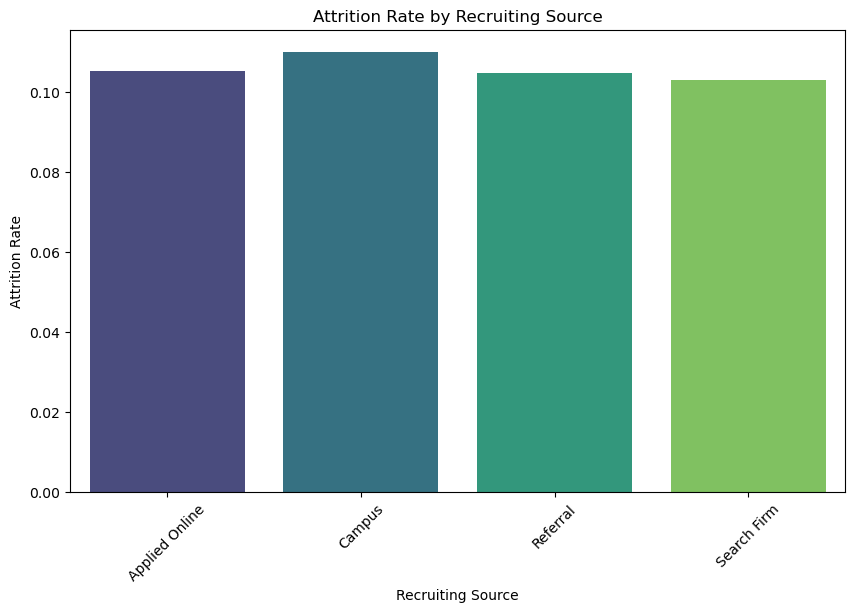

In [49]:
# Calculate attrition rate by recruiting source
attrition_rate_by_source = df.groupby('recruiting_source')['attrition'].mean().sort_values(ascending=False)

# Display the result
print(attrition_rate_by_source)

plt.figure(figsize=(10, 6))
sns.barplot(x=attrition_rate_by_source.index, y=attrition_rate_by_source.values, palette="viridis")
plt.title("Attrition Rate by Recruiting Source")
plt.xlabel("Recruiting Source")
plt.ylabel("Attrition Rate")
plt.xticks(rotation=45)
plt.show()

# Average Performance Rating by Recruiting Source

recruiting_source
Referral          2.906395
Search Firm       2.897311
Campus            2.893206
Applied Online    2.891409
Name: performance_rating, dtype: float64


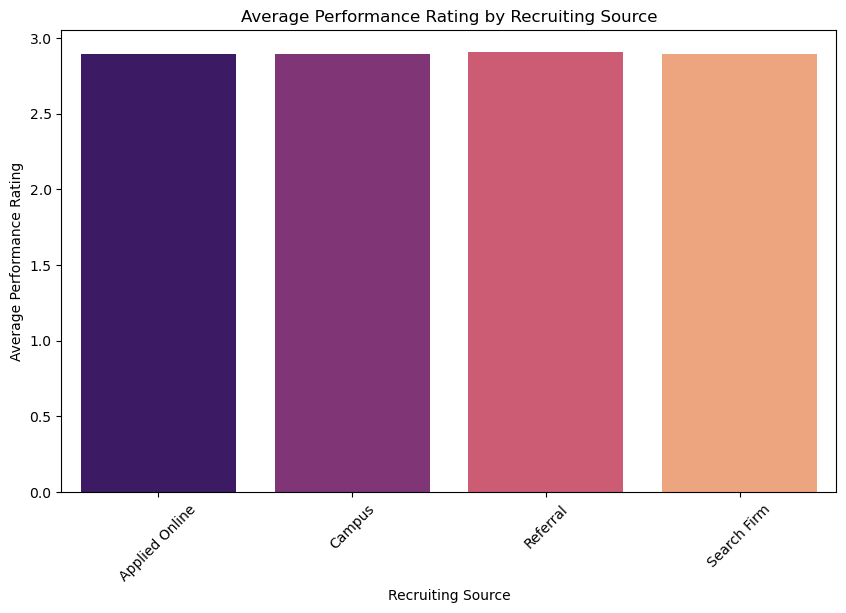

In [50]:
# Calculate average performance rating by recruiting source
avg_performance_by_source = df.groupby('recruiting_source')['performance_rating'].mean().sort_values(ascending=False)

# Display the result
print(avg_performance_by_source)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_performance_by_source.index, y=avg_performance_by_source.values, palette="magma")
plt.title("Average Performance Rating by Recruiting Source")
plt.xlabel("Recruiting Source")
plt.ylabel("Average Performance Rating")
plt.xticks(rotation=45)
plt.show()

# Sales Quota Achievement by Source (Mean and Median)

                       mean  median
recruiting_source                  
Search Firm        0.779417     1.0
Applied Online     0.771262     1.0
Campus             0.769706     1.0
Referral           0.766331     1.0


<Figure size 1200x600 with 0 Axes>

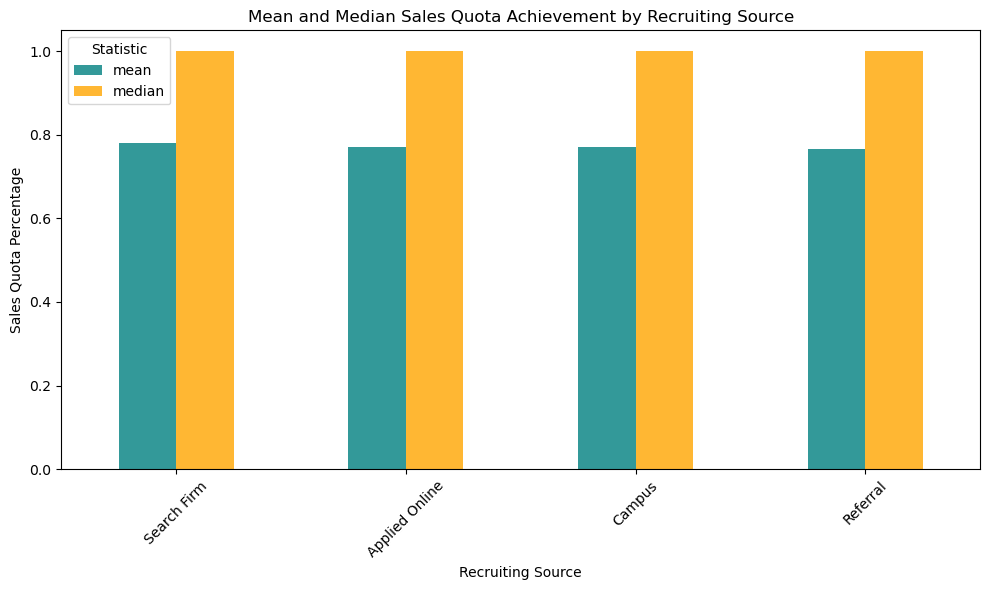

In [51]:
# Calculate mean and median sales_quota_pct by recruiting source
sales_quota_stats_by_source = df.groupby('recruiting_source')['sales_quota_pct'].agg(['mean', 'median']).sort_values(by='mean', ascending=False)

# Display the result
print(sales_quota_stats_by_source)

plt.figure(figsize=(12, 6))
sales_quota_stats_by_source.plot(kind="bar", color=["teal", "orange"], alpha=0.8, figsize=(10,6))
plt.title("Mean and Median Sales Quota Achievement by Recruiting Source")
plt.xlabel("Recruiting Source")
plt.ylabel("Sales Quota Percentage")
plt.xticks(rotation=45)
plt.legend(title="Statistic")
plt.tight_layout()
plt.show()

# Interaction between Attrition and Performance (Grouped Bar Chart)

attrition                 0         1
recruiting_source                    
Applied Online     2.895446  2.857086
Campus             2.897852  2.855597
Referral           2.909773  2.877489
Search Firm        2.897999  2.891314


<Figure size 1200x600 with 0 Axes>

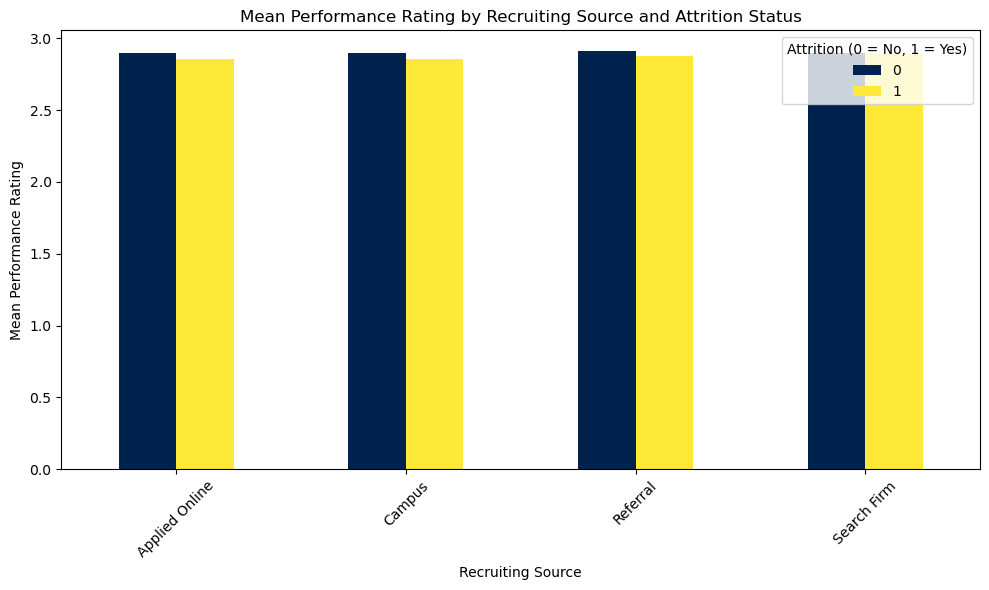

In [52]:
# Calculate mean performance rating for each combination of recruiting_source and attrition
performance_by_source_attrition = df.groupby(['recruiting_source', 'attrition'])['performance_rating'].mean().unstack()

# Display the result
print(performance_by_source_attrition)

plt.figure(figsize=(12, 6))
performance_by_source_attrition.plot(kind='bar', stacked=False, colormap="cividis", figsize=(10,6))
plt.title("Mean Performance Rating by Recruiting Source and Attrition Status")
plt.xlabel("Recruiting Source")
plt.ylabel("Mean Performance Rating")
plt.xticks(rotation=45)
plt.legend(title="Attrition (0 = No, 1 = Yes)")
plt.tight_layout()
plt.show()

In [53]:
# Average Sales Number by Recruiting Source
avg_sales_by_source = df.groupby('recruiting_source')['sales_quota_pct'].mean()
print("Average Sales Number by Recruiting Source:")
print(avg_sales_by_source)

# Average Attrition Rate by Recruiting Source
avg_attrition_by_source = df.groupby('recruiting_source')['attrition'].mean()
print("\nAverage Attrition Rate by Recruiting Source:")
print(avg_attrition_by_source)

Average Sales Number by Recruiting Source:
recruiting_source
Applied Online    0.771262
Campus            0.769706
Referral          0.766331
Search Firm       0.779417
Name: sales_quota_pct, dtype: float64

Average Attrition Rate by Recruiting Source:
recruiting_source
Applied Online    0.105244
Campus            0.109938
Referral          0.104613
Search Firm       0.102990
Name: attrition, dtype: float64
